In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys

# helper functions
sys.path.insert(0, "../src/lib")

import dataset as dataset_funcs
import cleaning as cleaning_funcs

pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [4]:
sales_df = pd.read_csv('../data/raw/sales.csv')
sales_df.DATE_ORDER = sales_df.DATE_ORDER.astype("datetime64")
sales_df["UNIT_PRICE"] = sales_df["REVENUE"] / sales_df["QTY_ORDER"]
sales_df.head()

,PROD_ID,DATE_ORDER,QTY_ORDER,REVENUE,UNIT_PRICE
0,P6,2015-08-02,1.000,1808.990,1808.990
1,P6,2015-08-17,1.000,1674.000,1674.000
2,P6,2015-08-17,1.000,1673.950,1673.950
3,P6,2015-08-11,1.000,1674.000,1674.000
4,P6,2015-08-17,1.000,1674.000,1674.000


as we mentioned on the **EXPLORATORY DATA ANALYSIS**, we will remove some bad data from our dataset to avoid propagating these errors to the model (using helper functions).

In [17]:
sales_df = cleaning_funcs.clean_sales_dataframe(sales_df)
sales_df.shape

(351090, 5)

let's split the data into each product (because each product may have different dynamics)

In [14]:
grouped = sales_df.groupby([sales_df.PROD_ID])
(p1,p2,p3,p4,p5,p6,p7,p8,p9) = [grouped.get_group(prod_id) for prod_id in grouped.groups.keys()]

In [15]:
# let's also aggregate rows with the same timestamp

# LATER

# dataset7 = p7.groupby(p7.DATE_ORDER).agg({
#    "QTY_ORDER":np.sum,
#    "UNIT_PRICE": np.mean
#})

let's use P7 in the first run because it's the product the with the most available data

In [18]:
p7 = p7.sort_values(['DATE_ORDER'])
p7.shape
p7

,PROD_ID,DATE_ORDER,QTY_ORDER,REVENUE,UNIT_PRICE
639,P6,2015-01-01,1.000,1914.800,1914.800
1673,P6,2015-01-02,1.000,1914.800,1914.800
1668,P6,2015-01-02,1.000,1914.800,1914.800
1275,P6,2015-01-02,1.000,1914.800,1914.800
1666,P6,2015-01-02,1.000,1914.800,1914.800
3310,P6,2015-01-02,1.000,1914.800,1914.800
635,P6,2015-01-02,1.000,1914.800,1914.800
2803,P6,2015-01-02,1.000,1914.800,1914.800
3305,P6,2015-01-02,1.000,1914.800,1914.800
326,P6,2015-01-03,1.000,1914.800,1914.800


In [9]:
# now just select the columns we will use in this very simple model
p7 = p7[["UNIT_PRICE","QTY_ORDER"]]

In [10]:
X,y = dataset_funcs.make_Xy_simple(p7)

In [12]:
X[:20]

array([[ 1914.8],
       [ 1914.8],
       [ 1914.8],
       [ 1914.8],
       [ 1914.8],
       [ 1914.8],
       [ 1914.8],
       [ 1914.8],
       [ 1914.8],
       [ 1914.8],
       [ 1914.8],
       [ 1914.8],
       [ 1914.8],
       [ 1914.8],
       [ 1914.8],
       [ 1914.8],
       [ 1914.8],
       [ 1914.8],
       [ 1914.8],
       [ 1914.8]])

In [11]:
X.shape,y.shape

((4102, 1), (4102,))

For the first approach I will use a simple linear model (linear regression) without regularization.

In [15]:
from sklearn.model_selection import train_test_split, KFold, cross_val_predict
from sklearn.linear_model import RidgeCV, LinearRegression
from sklearn.metrics import mean_absolute_error

MAE for cross validated model: 0.03392316245327401


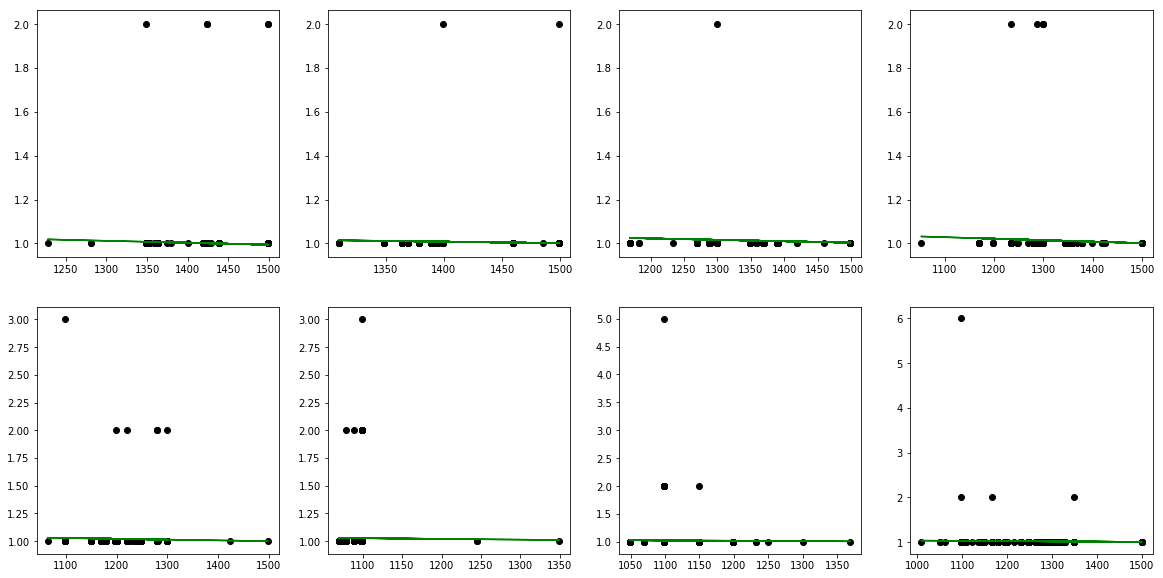

In [16]:
kf = KFold(n_splits=8)

fig, axes = plt.subplots(2, 4, figsize=(20,10))

# I think MAE (mean absolute error) is easier to interpret than MSE (mean squared error)
MAES = []

for split,(train_index, test_index) in enumerate(kf.split(X)):  
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    regr = LinearRegression()
    regr.fit(X_train,y_train)
    MAE= mean_absolute_error(y_test,regr.predict(X_test))
    MAES.append(MAE)
    axes[split // 4][split % 4].scatter(X_test, y_test, color='black')
    axes[split // 4][split % 4].plot(X_test, regr.predict(X_test), color='green')
    
# this can also be obtained using model_selection.cross_val_score    
final_MAE = np.array(MAES).mean()


print("MAE for cross validated model: {0}".format(final_MAE))

comment: this is clearly not a suitable modelling for the task at hand.

In [17]:
regr = LinearRegression()
predicted = cross_val_predict(regr, X, y, cv=8)

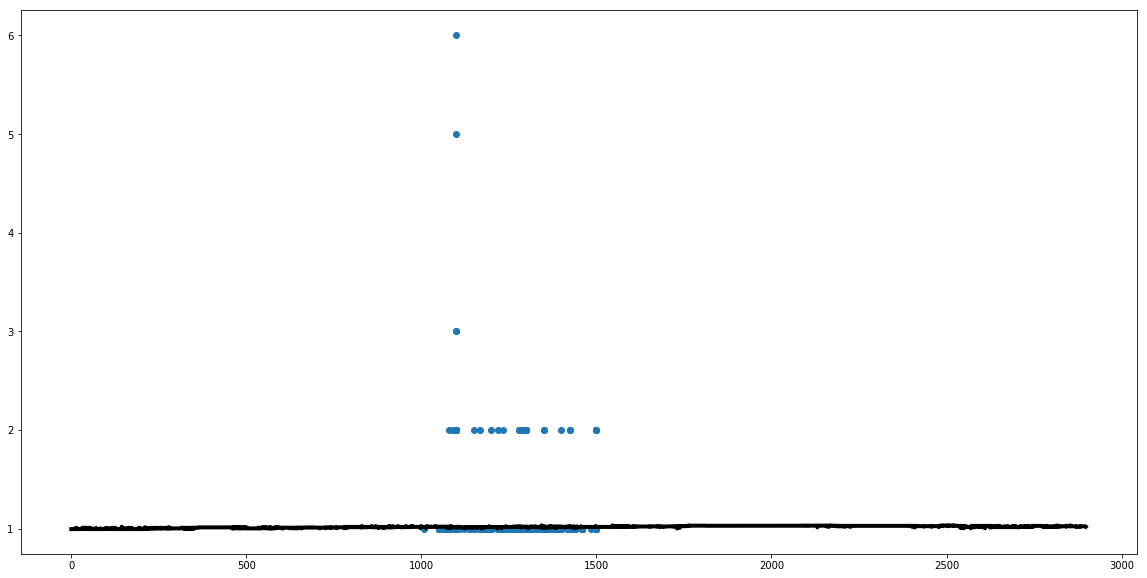

In [24]:
fig, ax = plt.subplots(figsize=(20,10))
ax.scatter(X,y )
ax.plot(predicted, 'k', lw=4)

comment: regression doesn't look like a good strategy here. Let's try a classification approach, since our targets are mostly discrete bins.